# Tailorit - Data Exploration

### Import required packages

In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tailor
from tailor.data import group_by
from tailor.visualization import plot_article_history

### Load data

In [3]:
df = tailor.load_data()

### Get an overview over the dataset

In [4]:
df.head(20)

,article_id,season,brand,color,Abteilung,WHG,WUG,time_on_sale,original_price,sells_price,discount,markdown,article_count,stock_total,avq,revenue
0,900001,Sommer,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,0,59.95,58.883333,1.066667,0.0,3.666667,1499.0,0.722704,217.483333
1,900001,Sommer,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,1,59.95,59.755714,0.194286,0.0,5.571429,1499.0,3.097303,333.230000
2,900001,Sommer,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,2,59.95,58.950000,1.000000,0.0,5.333333,1499.0,5.303536,315.233333
3,900001,Sommer,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,3,59.95,58.785000,1.165000,0.0,6.750000,1499.0,7.204803,399.172500
4,900001,Sommer,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,4,59.95,59.750000,0.200000,0.0,5.666667,1499.0,9.339560,337.716667
5,900001,Sommer,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,5,59.95,59.492000,0.458000,0.0,5.400000,1499.0,11.674450,318.932000
6,900001,Sommer,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,6,59.95,59.533333,0.416667,0.0,8.833333,1499.0,14.454080,526.558333
7,900001,Sommer,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,7,59.95,58.450000,1.500000,0.0,5.500000,1499.0,16.855682,324.423333
8,900001,Sommer,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,8,59.95,59.911667,0.038333,0.0,5.833333,1499.0,19.157216,349.486667
9,900001,Sommer,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,9,59.95,58.350000,-10.400000,12.0,7.400000,1499.0,21.774516,437.630000


In [5]:
pd.options.display.float_format = "{:.2f}".format
df.describe(include=np.number)

,time_on_sale,original_price,sells_price,discount,markdown,article_count,stock_total,avq,revenue
count,216580.00,216580.00,216580.00,216580.00,216580.00,216580.00,216580.00,216580.00,216580.00
mean,12.17,52.81,45.17,2.70,4.94,7.49,1979.82,30.09,282.86
std,7.38,22.65,20.89,5.08,9.49,8.58,1891.05,23.56,299.06
min,0.00,9.95,-32.01,-30.00,-10.00,1.00,106.00,0.00,-32.01
25%,6.00,39.95,29.48,0.19,0.00,2.20,773.00,9.41,99.92
50%,12.00,49.95,42.29,0.84,0.00,4.40,1504.00,25.91,182.05
75%,18.00,69.95,59.03,3.04,10.00,9.50,2749.00,46.54,350.95
max,25.00,179.95,179.95,88.95,90.00,156.14,36396.00,100.12,5511.12


In [6]:
df.describe(include=['category'])

,article_id,season,brand,color,Abteilung,WHG,WUG
count,216580,216580,216580,216580,216580,216580,216580
unique,8708,2,75,40,7,43,152
top,908708,Sommer,Fimmilena,schwarz,Abteilung002,WHG015,WUG053
freq,26,116633,14764,45986,95349,23772,9678


### Check for null values

In [7]:
df.isna().values.any()

False

Wow, we're in luck, there are no null values in the dataset!

### Plot sample article

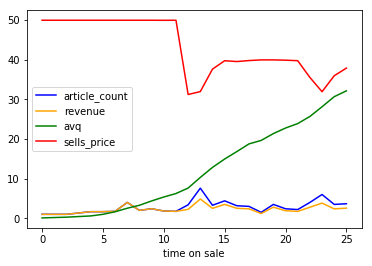

In [8]:
sample_id = df.sample().article_id.values
article = df.loc[df.article_id == sample_id]
plt.plot(article.time_on_sale, article.article_count, 'blue')
plt.plot(article.time_on_sale, article.revenue/article.original_price, 'orange', label='revenue')
plt.plot(article.time_on_sale, article.avq, 'green')
plt.plot(article.time_on_sale, article.sells_price, 'red')
plt.xlabel('time on sale')
plt.legend();

We can see the clear relationship between the amount of articles sold, it's sells price (including markdown and discounts) and the generated revenue here.